In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data= pd.read_csv("titanic.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
data= data.drop('deck', axis=1)
data= data.drop('embarked', axis=1)

In [7]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
data['age']= data['age'].fillna(data['age'].mean())

In [9]:
data= data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   class        889 non-null    object 
 8   who          889 non-null    object 
 9   adult_male   889 non-null    bool   
 10  embark_town  889 non-null    object 
 11  alive        889 non-null    object 
 12  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 85.1+ KB


In [11]:
data['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [12]:
data['embark_town']= data['embark_town'].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

C:\Users\Welcome\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


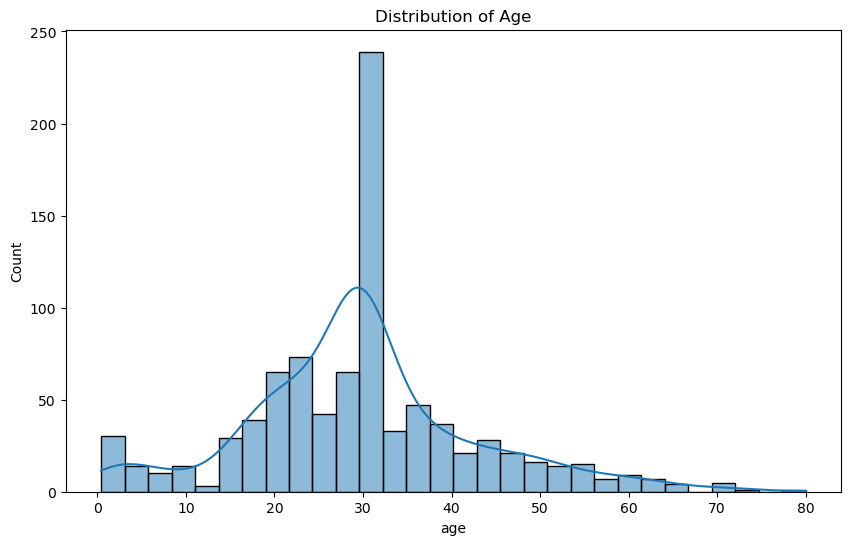

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data['age'],kde=True)
plt.title('Distribution of Age')
plt.show()

C:\Users\Welcome\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


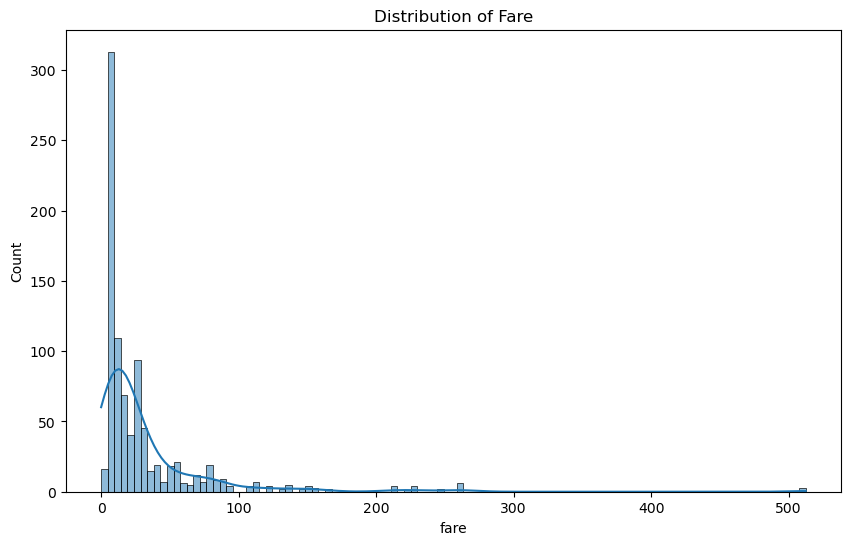

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data['fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

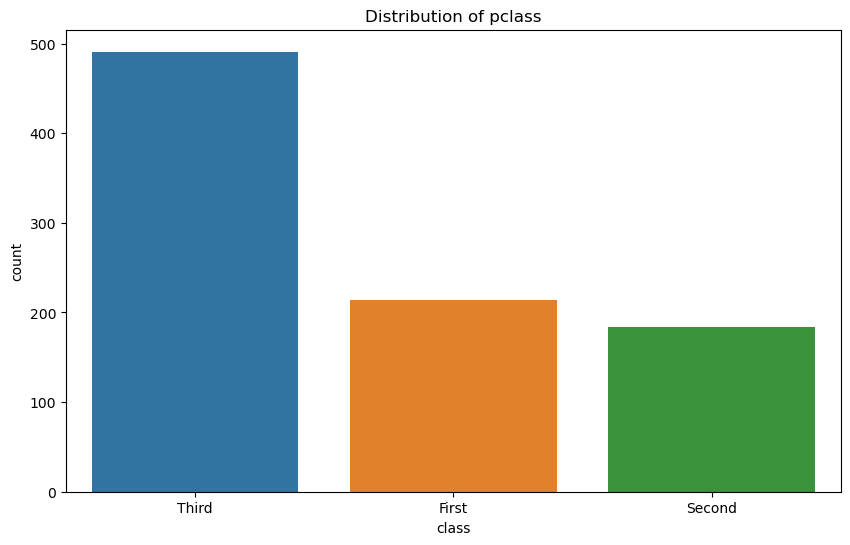

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='class')
plt.title('Distribution of pclass')
plt.show()

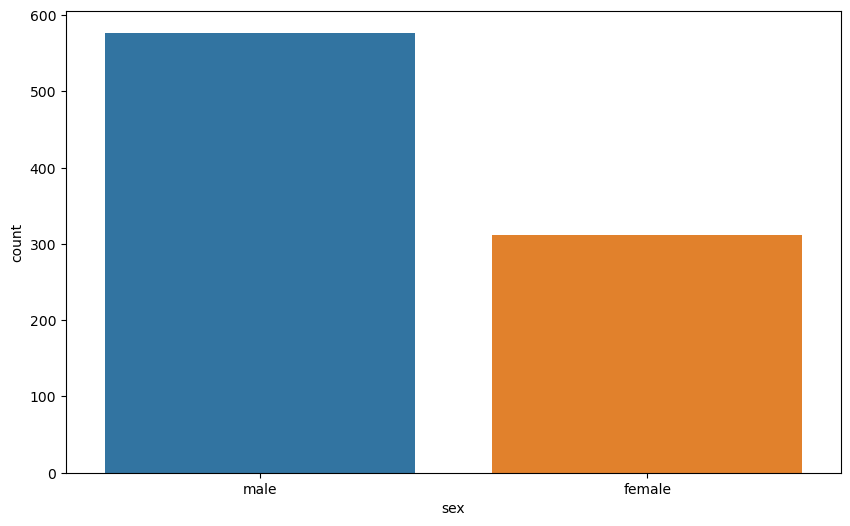

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='sex')
plt.show()

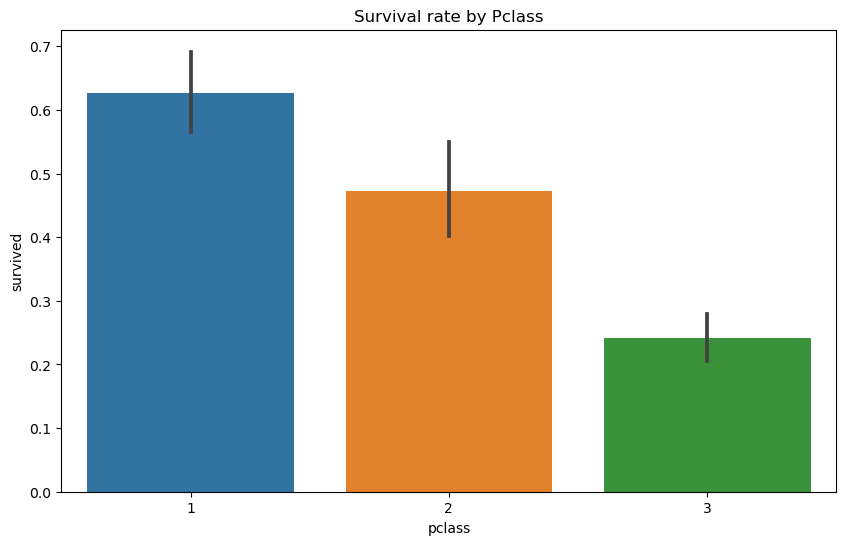

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='pclass', y='survived')
plt.title('Survival rate by Pclass')
plt.show()

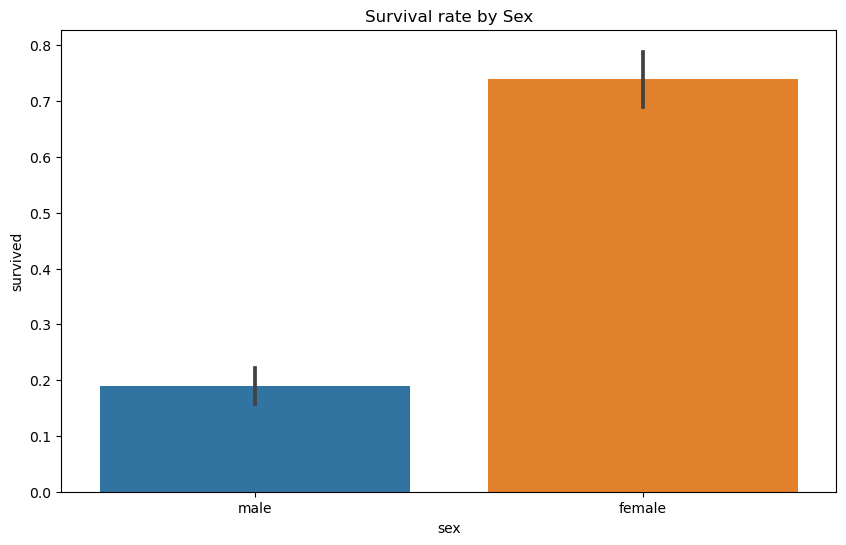

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='sex', y='survived')
plt.title('Survival rate by Sex')
plt.show()

In [19]:
age_bins= [0,12,18,35,60,80]
age_labels= ['Child','Teen','Adult','Mid_Age','Senior']
data['Age_Group']=pd.cut(data['age'], bins= age_bins, labels= age_labels, right= False)

In [20]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [21]:
for col in data.columns:
    if data[col].dtype== 'object' or data[col].dtype== 'category':
        data[col]= le.fit_transform(data[col])
        print(col, le.classes_)

sex ['female' 'male']
class ['First' 'Second' 'Third']
who ['child' 'man' 'woman']
embark_town ['Cherbourg' 'Queenstown' 'Southampton']
alive ['no' 'yes']
Age_Group ['Adult' 'Child' 'Mid_Age' 'Senior' 'Teen' nan]


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    int32  
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   class        889 non-null    int32  
 8   who          889 non-null    int32  
 9   adult_male   889 non-null    bool   
 10  embark_town  889 non-null    int32  
 11  alive        889 non-null    int32  
 12  alone        889 non-null    bool   
 13  Age_Group    889 non-null    int32  
dtypes: bool(2), float64(2), int32(6), int64(4)
memory usage: 71.2 KB


<function matplotlib.pyplot.show(close=None, block=None)>

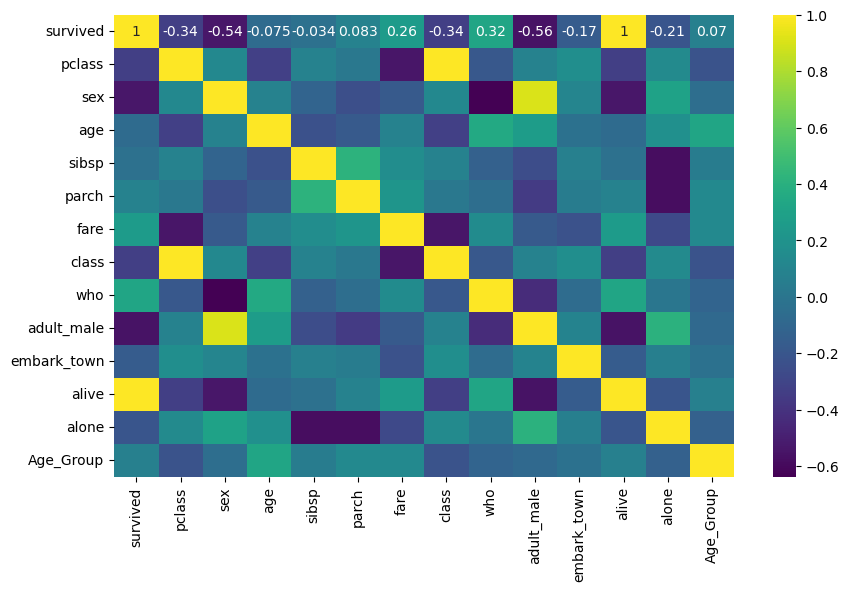

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(data=data.corr(), annot= True, cmap='viridis')
plt.show

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
x= data.drop('survived', axis=1)
y= data['survived']

In [26]:
print(x.shape)
print(y.shape)

(889, 13)
(889,)


In [27]:
x_train, x_test, y_train, y_test= train_test_split(x,y, train_size= 0.75, random_state=42)

In [28]:
lr= LogisticRegression()

In [29]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,Age_Group
0,0,3,1,22.0,1,0,7.2500,2,1,True,2,0,False,0
1,1,1,0,38.0,1,0,71.2833,0,2,False,0,1,False,2
2,1,3,0,26.0,0,0,7.9250,2,2,False,2,1,True,0
3,1,1,0,35.0,1,0,53.1000,0,2,False,2,1,False,2
4,0,3,1,35.0,0,0,8.0500,2,1,True,2,0,True,2


In [30]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,Age_Group
886,0,2,1,27.000000,0,0,13.00,1,1,True,2,0,True,0
887,1,1,0,19.000000,0,0,30.00,0,2,False,2,1,True,0
888,0,3,0,29.699118,1,2,23.45,2,2,False,2,0,False,0
889,1,1,1,26.000000,0,0,30.00,0,1,True,0,1,True,0
890,0,3,1,32.000000,0,0,7.75,2,1,True,1,0,True,0


In [31]:
lr.fit(x_train, y_train)

C:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
preds= lr.predict(x_test)

In [33]:
from sklearn.metrics import *

In [34]:
acc= accuracy_score(y_test, preds)
acc

1.0